# Data Preprocessing

### 1. Import the necessary libraries and read the data.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### i)  Reading the dataset

In [46]:
fifa = pd.read_csv('fifa.csv')
fifa.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### ii)Informaton about the data-set

In [47]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

### 2.Dropping  the columns which contains URL of Photo, Flag and Club Logo, and also from Crossing to GKReflexes as those are not requirred for further analysis:-

In [48]:
#Dropping columns that seem unecessary for analysis
fifa_df = fifa.drop(columns=['Photo','Flag','Club Logo'],axis=1)
fifa_df.drop(fifa_df.loc[:,'Crossing':'GKReflexes'],inplace= True,axis=1)
fifa_df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,€196.4M


### 3.The following columns need to be converted for further analysis:

#### i) 'Value'- Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix. And also converting everything into thousands.
#### ii)'Wage'- Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively. Convert to Float after getting rid of currency symbol and suffix.  And also converting everything into thousands.
#### iii)'Release Clause'-	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively. Convert to Float after getting rid of currency symbol and suffix. And also converting everything into thousands.

In [49]:
#Convert to Float after getting rid of currency symbol and suffix.
def convert(val):
    if val[-1] == 'M':
        val = float(val[1:-1])*1000
    elif val[-1] == "K": 
        val = float(val[1:-1])
    else:
        val = float(val[1:])/1000
    return val    

In [50]:
fifa_df['Value'] = fifa_df['Value'].apply(convert)
fifa_df['Value']

0        110500.0
1         77000.0
2        118500.0
3         72000.0
4        102000.0
           ...   
18202        60.0
18203        60.0
18204        60.0
18205        60.0
18206        60.0
Name: Value, Length: 18207, dtype: float64

In [51]:
#Convert to Float after getting rid of currency symbol and suffix.
fifa_df['Wage'] = fifa_df['Wage'].apply(convert)
fifa_df['Wage']

0        565.0
1        405.0
2        290.0
3        260.0
4        355.0
         ...  
18202      1.0
18203      1.0
18204      1.0
18205      1.0
18206      1.0
Name: Wage, Length: 18207, dtype: float64

In [52]:
#Convert to Float after getting rid of currency symbol and suffix.
fifa_df['Release Clause'] = fifa_df[fifa_df['Release Clause'].notnull()]['Release Clause'].apply(convert)
fifa_df['Release Clause']

0        226500.0
1        127100.0
2        228100.0
3        138600.0
4        196400.0
           ...   
18202       143.0
18203       113.0
18204       165.0
18205       143.0
18206       165.0
Name: Release Clause, Length: 18207, dtype: float64

In [53]:
#Convert to int with only year
#pd.to_datetime(fifa_df[fifa_df['Joined'].notnull()]['Joined']).dt.year
#series.dt- used to access the values of the series as datetimelike 
#Pandas Series.dt.date attribute return a numpy array of python datetime.date objects.

#### iv)'Joined'-Year as a string, in some cases complete date as string	Convert to int with only year
#### v)'Contract Valid Until'-Date as a string	Convert to datetime type
#### vi)'Height'-In inches with a quotation mark 	Convert to Float with decimal points
#### vii)'Weight'-Contains the suffix lbs 	Remove the suffix and convert to float

In [54]:
#Convert to int with only year
pd.to_datetime(fifa_df[fifa_df['Joined'].notnull()]['Joined']).dt.year

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 16654, dtype: int64

In [55]:
#Convert to datetime type 
fifa_df['Contract Valid Until'] = pd.to_datetime(fifa_df['Contract Valid Until'])

In [56]:
#Function to change height into cm and Converting to Float with decimal points
def change(ht):
    Ht = ht.split("'")
    H_inches = int(Ht[0]) * 12 + float(Ht[1])
    H_cm = 2.54*H_inches
    return H_cm

In [57]:
fifa_df['Height'] = fifa_df[fifa_df['Height'].notnull()]['Height'].apply(change)

In [58]:
#Function to change weight into kg and Converting to Float with decimal points
def poundsToMetric(pounds):
    wt = pounds.split('lbs')[0]
    kilograms = float(wt)/2.2
    return kilograms

In [59]:
fifa_df['Weight'] = fifa_df[fifa_df['Weight'].notnull()]['Weight'].apply(poundsToMetric)

In [60]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      17966 non-null  object        
 7   Value                     18207 non-null  float64       
 8   Wage                      18207 non-null  float64       
 9   Preferred Foot            18159 non-null  object        
 10  International Reputation  18159 non-null  float64       
 11  Weak Foot                 18159 non-null  float64       
 12  Skill Moves       

### 4.Checking for missing values and do a mean imputation where necessary.

In [61]:
#percentage of missing values in each column
fifa_df.isnull().sum()/len(fifa_df) *100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Release Clause               8.590103
dtype: float64

In [62]:
#Dropping the column-'loaned from' for further analysis as about 95% of data is missing
fifa_df = fifa_df.drop(columns = 'Loaned From',axis=1)

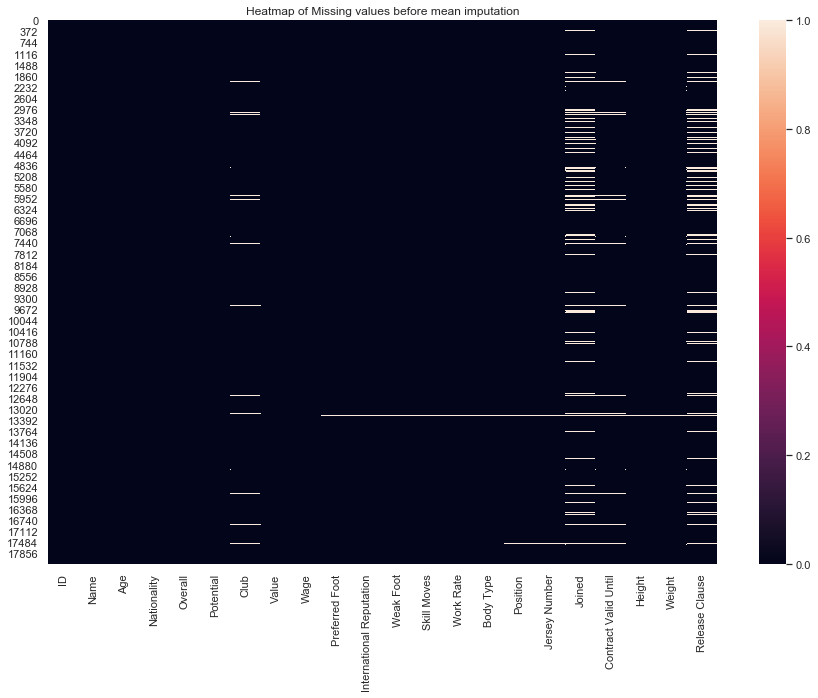

In [63]:
plt.figure(figsize=(15,10))
sns.heatmap(data=fifa_df.isna())
plt.title("Heatmap of Missing values before mean imputation")
plt.show()

In [64]:
fifa_df['Height'].describe()

count    18159.000000
mean       181.257584
std          6.730145
min        154.940000
25%        175.260000
50%        180.340000
75%        185.420000
max        205.740000
Name: Height, dtype: float64

Removal of missing values in 'Height' column:

The Visualisation:


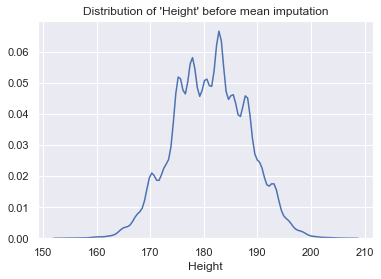

Filling the null values of 'Height' column with mean value: 181.26

The Visualisation after imputation:


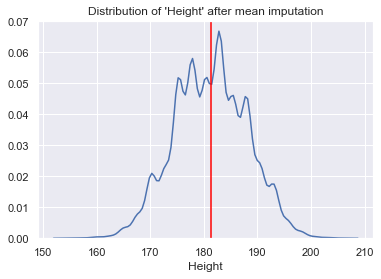

Inference:
The percentage of null values in 'Health' column is less than 5% and hence mean imputation was done


In [65]:
print("Removal of missing values in 'Height' column:\n")
sns.set(style='darkgrid')
print('The Visualisation:')
sns.distplot(fifa_df['Height'],hist= False)
plt.title("Distribution of 'Height' before mean imputation")
plt.xlabel('Height')
plt.show()


print(f"Filling the null values of 'Height' column with mean value: {round(fifa_df['Height'].mean(),2)}\n")
fifa_df['Height'] = fifa_df['Height'].fillna(fifa_df['Height'].mean())


sns.distplot(fifa_df['Height'],hist= False)
print('The Visualisation after imputation:')
plt.axvline(fifa_df['Height'].mean(),color= 'red',label='mean')
plt.title("Distribution of 'Height' after mean imputation")
plt.xlabel('Height')
plt.show()

print(f'''Inference:
The percentage of null values in 'Health' column is less than 5% and hence mean imputation was done''')

In [66]:
fifa_df['Weight'].describe()

count    18159.000000
mean        75.445059
std          7.087884
min         50.000000
25%         70.000000
50%         75.000000
75%         80.000000
max        110.454545
Name: Weight, dtype: float64

Removal of missing values in 'Weight' column:

The Visualisation:


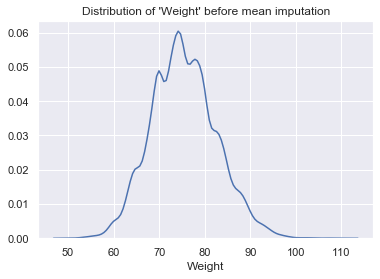

Filling the null values of 'Weight' column with mean value: 75.45

The Visualisation after imputation:


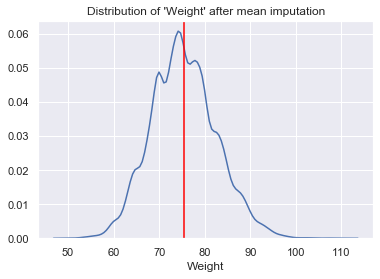

Inference:
The percentage of null values in 'Wealth' column is less than 5% and hence mean imputation was done


In [67]:
print("Removal of missing values in 'Weight' column:\n")
sns.set(style='darkgrid')
print('The Visualisation:')
sns.distplot(fifa_df['Weight'],hist= False)
plt.title("Distribution of 'Weight' before mean imputation")
plt.xlabel('Weight')
plt.show()


print(f"Filling the null values of 'Weight' column with mean value: {round(fifa_df['Weight'].mean(),2)}\n")
fifa_df['Weight'] = fifa_df['Weight'].fillna(fifa_df['Weight'].mean())


sns.distplot(fifa_df['Weight'],hist= False)
print('The Visualisation after imputation:')
plt.axvline(fifa_df['Weight'].mean(),color= 'red',label='mean')
plt.title("Distribution of 'Weight' after mean imputation")
plt.xlabel('Weight')
plt.show()

print(f'''Inference:
The percentage of null values in 'Wealth' column is less than 5% and hence mean imputation was done''')

In [68]:
#Removing the null values for the International Reputation column
fifa_df['International Reputation'] = fifa_df['International Reputation'].astype('object')
fifa_df['International Reputation'] = fifa_df['International Reputation'].fillna(fifa_df['International Reputation'].mode()[0])

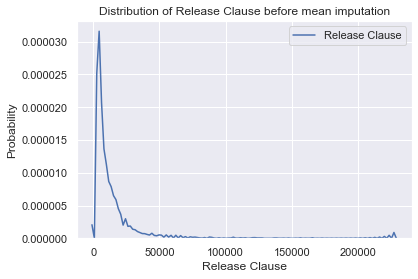

In [69]:
#Removing the null values for the release clause column
sns.kdeplot(data=fifa_df['Release Clause'])
plt.title("Distribution of Release Clause before mean imputation")
plt.xlabel('Release Clause')
plt.ylabel('Probability')
plt.show()

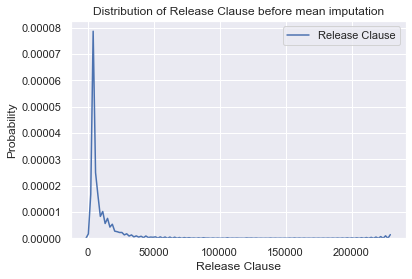

In [70]:
fifa_df['Release Clause'] = fifa_df['Release Clause'].fillna(fifa_df['Release Clause'].mean())
sns.kdeplot(data=fifa_df['Release Clause'])
plt.title("Distribution of Release Clause before mean imputation")
plt.xlabel('Release Clause')
plt.ylabel('Probability')
plt.show()

## EXPOLATORY ANALYSIS

### 1.Plot the distribution of Overall rating for all players.

In [71]:
fifa_df['Overall'].describe()

count    18207.000000
mean        66.238699
std          6.908930
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

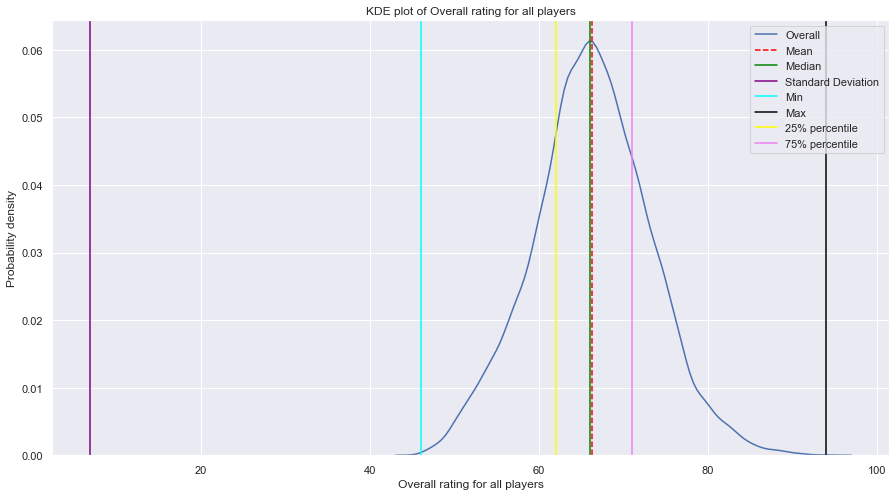

In [72]:
plt.figure(figsize = (15,8))
sns.kdeplot(data=fifa_df['Overall'])
plt.title("KDE plot of Overall rating for all players")
plt.axvline(fifa_df['Overall'].mean(),color='red',label='Mean',linestyle='--')
plt.axvline(fifa_df['Overall'].median(),color='green',label='Median')
plt.axvline(fifa_df['Overall'].std(),color='purple',label='Standard Deviation')
plt.axvline(fifa_df['Overall'].min(),color='cyan',label='Min')
plt.axvline(fifa_df['Overall'].max(),color='black',label='Max')
plt.axvline(fifa_df['Overall'].quantile(0.25),color='yellow',label='25% percentile')
plt.axvline(fifa_df['Overall'].quantile(0.75),color='violet',label='75% percentile')
plt.xlabel("Overall rating for all players")
plt.ylabel("Probability density")
plt.legend()
plt.show()

### 2.Generate pair plots for the following variables:

In [73]:
fifa_df.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation       0
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Joined                      1553
Contract Valid Until         289
Height                         0
Weight                         0
Release Clause                 0
dtype: int64

The Pair-plot Visualization :


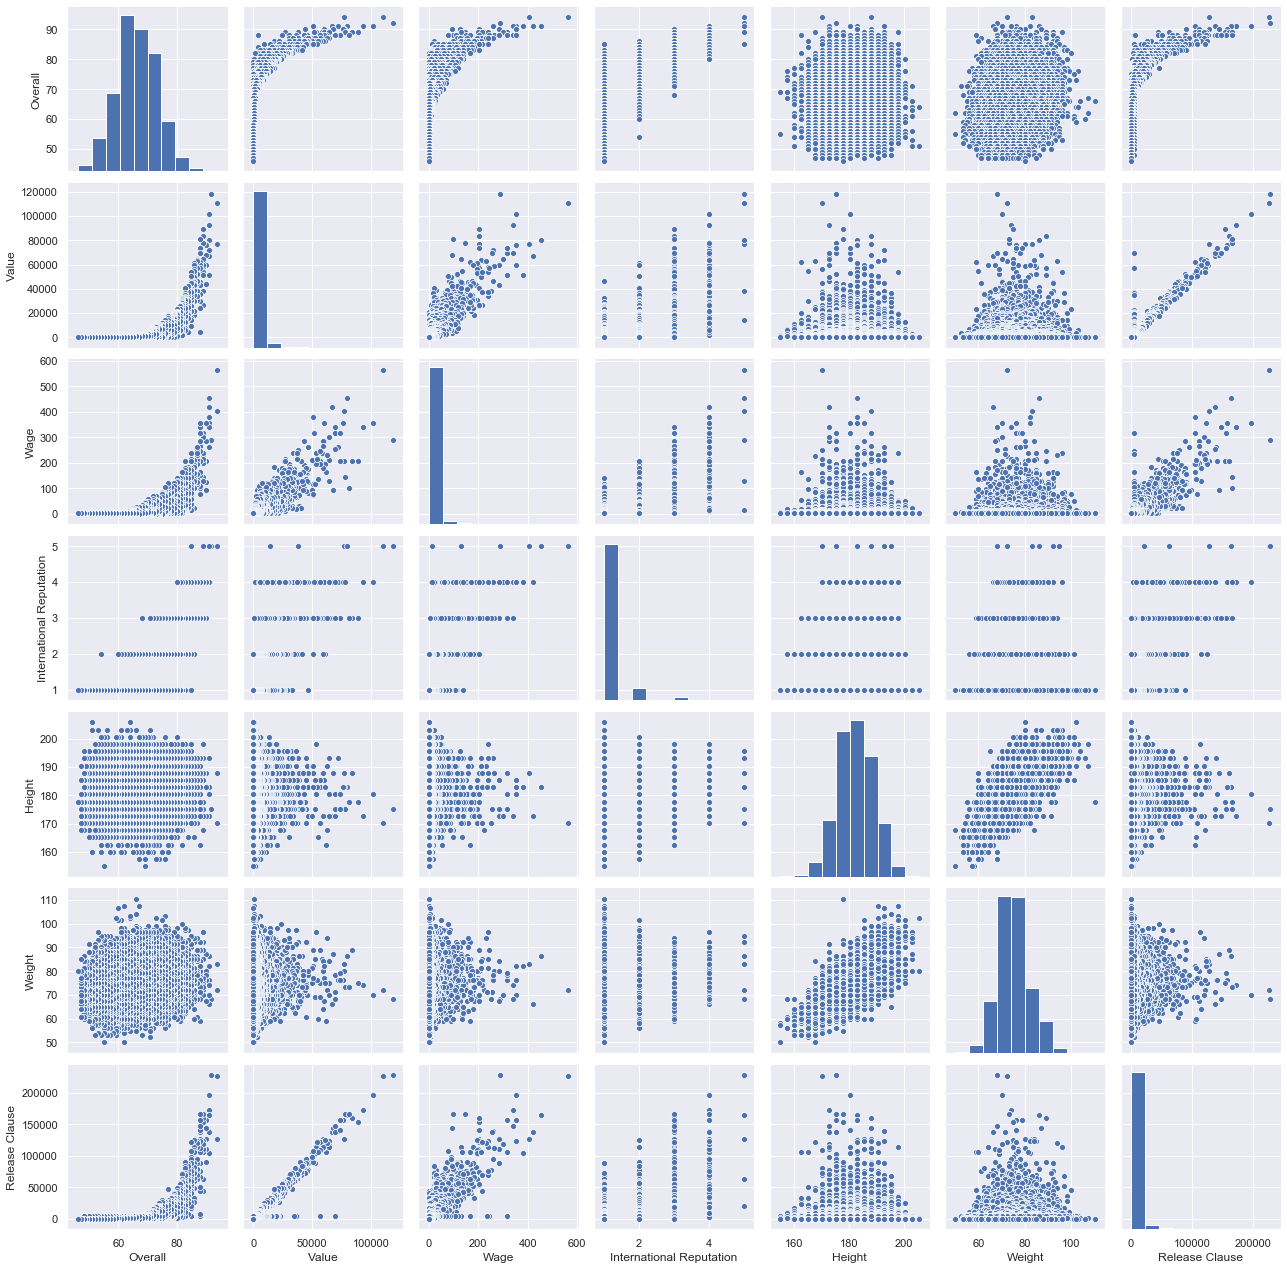

Inferences :All the diagonal-plots denotes univariate analysis for each variable. 



In [74]:
#Generating pair-plots for these variables
pair_df = fifa_df[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']]
sns.pairplot(data = pair_df)
print(f"The Pair-plot Visualization :")
plt.show()
print(f"Inferences :All the diagonal-plots denotes univariate analysis for each variable. \n") 

### 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
#### a)	What would the average wage for this set of players be?
#### b)	What is the average age?
#### c)	Is there a correlation between the Overall rating and Value for these players? 3.Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [75]:
#By ranking method:-
print(f'3.A table containing the top 20 players ranked by Overall score and whose contract expires in 2020')
fifa_df['score_rank'] = fifa_df['Overall'].rank(ascending= False,method = 'dense')
top20_df= fifa_df.sort_values(by='score_rank')
top20_df = top20_df[top20_df['Contract Valid Until'].dt.year==2020].head(20)
top20_df

3.A table containing the top 20 players ranked by Overall score and whose contract expires in 2020


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Release Clause,score_rank
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,...,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",2020-01-01,193.04,76.363636,138600.0,3.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000.0,340.0,Right,...,High/ Medium,Normal,LF,10.0,"Jul 1, 2012",2020-01-01,172.72,74.090909,172100.0,3.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000.0,420.0,Right,...,High/ High,Lean,RCM,10.0,"Aug 1, 2012",2020-01-01,172.72,66.363636,137400.0,3.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000.0,380.0,Right,...,High/ Medium,Normal,RCB,15.0,"Aug 1, 2005",2020-01-01,182.88,82.272727,104600.0,3.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000.0,285.0,Left,...,High/ Medium,Normal,LCM,21.0,"Jul 14, 2010",2020-01-01,172.72,67.272727,111000.0,4.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000.0,200.0,Right,...,High/ High,Lean,LS,21.0,"Jul 16, 2013",2020-01-01,185.42,77.272727,111000.0,5.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000.0,215.0,Left,...,Medium/ High,Normal,LCB,3.0,"Jul 1, 2005",2020-01-01,187.96,85.000000,44600.0,5.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000.0,165.0,Right,...,Medium/ High,Normal,RCB,2.0,"Jul 1, 2012",2020-01-01,182.88,82.272727,44400.0,6.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500.0,205.0,Right,...,High/ Medium,Lean,CAM,10.0,"Aug 30, 2013",2020-01-01,180.34,76.363636,141500.0,6.0
49,189332,Jordi Alba,29,Spain,87,87,FC Barcelona,38000.0,250.0,Left,...,High/ Medium,Normal,LB,18.0,"Jul 1, 2012",2020-01-01,170.18,68.181818,77900.0,7.0


In [76]:
top20_wage = top20_df['Wage'].mean()
print(f'3(a)The average wage for this set of players is',top20_wage)

3(a)The average wage for this set of players is 203.95


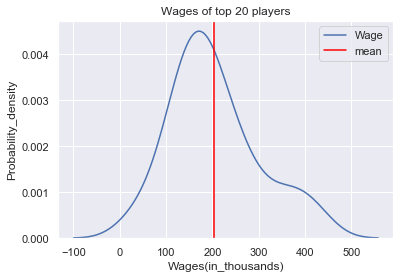

In [77]:
sns.kdeplot(data= top20_df['Wage'])
plt.title('Wages of top 20 players')
plt.axvline(top20_df['Wage'].mean(),color= 'red',label='mean')
plt.xlabel('Wages(in_thousands)')
plt.ylabel('Probability_density')
plt.legend()
plt.show()

In [78]:
print(f'3(b)The average age for this set of players is',top20_df['Age'].mean())

3(b)The average age for this set of players is 30.7


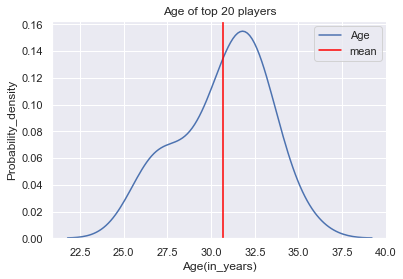

In [79]:
sns.kdeplot(data= top20_df['Age'])
plt.title('Age of top 20 players')
plt.axvline(top20_df['Age'].mean(),color= 'red',label='mean')
plt.xlabel('Age(in_years)')
plt.ylabel('Probability_density')
plt.legend()
plt.show()

3(c)The correlation between the Overall rating and Value for these players

          Overall     Value
Overall  1.000000  0.778674
Value    0.778674  1.000000


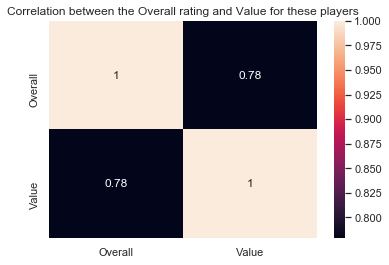

Inference:From the above graph, it is observed that valuation of a footballer increases with his overall rating.


In [80]:
print(f'3(c)The correlation between the Overall rating and Value for these players\n')
corr_df = top20_df[['Overall','Value']]
print(corr_df.corr())
sns.heatmap(corr_df.corr(),annot = True)
plt.title('Correlation between the Overall rating and Value for these players')
plt.show()
print('Inference:From the above graph, it is observed that valuation of a footballer increases with his overall rating.')

### 4.	Generate tables containing the top 5 players by Overall rating for each unique position.
#### a)	Are there any players appearing in more than one Table . Please point out such players.
#### b)	What is the average wage one can expect to pay for the top 5 in every position?on

In [81]:
fifa_df['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [82]:
fifa_df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [83]:
fifa_df['Position'].isnull().sum()

60

In [84]:
fifa_df['Position'] = fifa_df['Position'].fillna(fifa_df['Position'].mode()[0])

In [85]:
print(f'4.The table containing top 5 players by Overall rating for each unique position')
#Grouping the dataframe w.r.t each unique position
gp_df = fifa_df.groupby('Position')
#Get the dataframe sorted by Overall rating in each position(sorting the values of each group within the grouped dataframe)
sort_df2= gp_df.apply(lambda x: x.sort_values('Overall',ascending= False))
#sort_df2 is a grouped and sorted dataframe,
#where we can see that it has multi-index one for position and the other index for row numbers,hence we use reset_index
top5_df = sort_df2[['Name','Overall','Position','Wage']].reset_index(drop=True)
# select top 5 rows within each position
top5_df = top5_df.groupby('Position').head()
top5_df.melt

4.The table containing top 5 players by Overall rating for each unique position


<bound method DataFrame.melt of                     Name  Overall Position   Wage
0           A. Griezmann       89      CAM  145.0
1             C. Eriksen       88      CAM  205.0
2        Roberto Firmino       86      CAM  195.0
3              T. Müller       86      CAM  135.0
4                M. Özil       86      CAM  190.0
...                  ...      ...      ...    ...
15995  Cristiano Ronaldo       94       ST  405.0
15996     R. Lewandowski       90       ST  205.0
15997            H. Kane       89       ST  205.0
15998          S. Agüero       89       ST  300.0
15999            G. Bale       88       ST  355.0

[135 rows x 4 columns]>

In [86]:
print('4(a) Are there any players appearing in more than one Table?.Please point out such players.')
player_df = top5_df['Name'].value_counts()
print('\nEach player has a count one hence we can conclude there are no players appearing in more than one table and we get an empty series-',player_df[player_df>1])

4(a) Are there any players appearing in more than one Table?.Please point out such players.

Each player has a count one hence we can conclude there are no players appearing in more than one table and we get an empty series- Series([], Name: Name, dtype: int64)


In [87]:
print(f'4(b)The average wage one can expect to pay for the top 5 in every position')
Avg_wage = top5_df.groupby('Position')[['Wage']].mean().reset_index()
Avg_wage

4(b)The average wage one can expect to pay for the top 5 in every position


,Position,Wage
0,CAM,174.0
1,CB,139.6
2,CDM,217.0
3,CF,47.4
4,CM,130.6
5,GK,192.8
6,LAM,81.6
7,LB,177.2
8,LCB,162.0
9,LCM,184.4


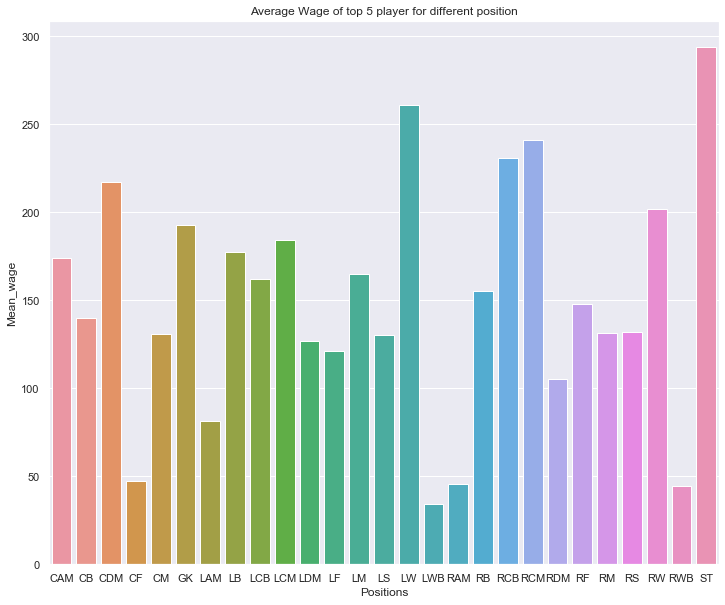

In [88]:
plt.figure(figsize=(12,10))
sns.barplot(data=Avg_wage,x='Position',y='Wage')
plt.title("Average Wage of top 5 player for different position")
plt.xlabel("Positions")
plt.ylabel('Mean_wage')
plt.show()